In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 20 # the lower limit of qubits for the circuit
steps= 3 #jump in qubit numbers
name_of_algo='hamiltonian'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.cambridge.fake_cambridge.FakeCambridgeV2,
 qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2,
 qiskit.providers.fake_provider.backends.lima.fake_lima.FakeLimaV2,
 qiskit.providers.fake_provider.backends.sydney.fake_sydney.FakeSydneyV2,
 qiskit.providers.fake_provider.backends.santiago.fake_santiago.FakeSantiagoV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.hamiltonian_simulation.HamiltonianSimulation(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- hamiltonian3 ---------------------------
     ┌───┐┌───────────┐┌───┐                           ┌─┐                    »
q_0: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──■────────────────■───────┤M├────────────────────»
     ├───┤├───────────┤├───┤┌─┴─┐┌──────────┐┌─┴─┐     └╥┘                 ┌─┐»
q_1: ┤ H ├┤ Rz(-3π/4) ├┤ H ├┤ X ├┤ Rz(-π/2) ├┤ X ├──■───╫───────────────■──┤M├»
     ├───┤├───────────┤├───┤└───┘└──────────┘└───┘┌─┴─┐ ║ ┌──────────┐┌─┴─┐└╥┘»
q_2: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──────────────────────┤ X ├─╫─┤ Rz(-π/2) ├┤ X ├─╫─»
     └───┘└───────────┘└───┘                      └───┘ ║ └──────────┘└───┘ ║ »
c: 3/═══════════════════════════════════════════════════╩═══════════════════╩═»
                                                        0                   1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c: 3/═╩═
«      2 
-------------------------- hamiltonian6 ---------------------------
     ┌───┐┌───────────┐┌───┐                          

In [5]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'hamiltonian3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'hamiltonian6': [0.3333333333333333, 1.0, 0.30303030303030304, 0.4298245614035088, 0.0, 0.1473684210526316], 'hamiltonian9': [0.2222222222222222, 1.0, 0.3137254901960784, 0.30158730158730157, 0.0, 0.10267857142857142], 'hamiltonian12': [0.16666666666666666, 1.0, 0.3188405797101449, 0.23198198198198197, 0.0, 0.07862407862407862], 'hamiltonian15': [0.13333333333333333, 1.0, 0.3218390804597701, 0.18840579710144928, 0.0, 0.06366459627329192], 'hamiltonian18': [0.1111111111111111, 1.0, 0.3238095238095238, 0.15858585858585858, 0.0, 0.05347593582887701]}


In [6]:
%time
import time
import pandas as pd
from IPython.display import display
jobs =[]
data=[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        timetaken=[]
        for i in range(0,5):
            start=time.time()
            job = backend().run(circuit, shots=1000)
            end=time.time()-start
            result = job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
            t=job.result(0).time_taken
            timetaken.append(t)
            #print(i+1,"th iteration Execution time::",t)
            print(label ," ExecutionTime:",t,"")
        print("------------------------------------------")
        score = np.mean(score_list) 
        sd = np.std(score_list)
        execution_time = np.mean(timetaken)
        dictionary={}
        dictionary["Backend_Time"]=backend().name
        dictionary["ciruit_Name"]=label    
        dictionary["Execution_Time"]=execution_time
        dictionary["Total_Time"]=end
        data.append(dictionary)
        jobs.append((label,benchmark,backend,job,score,sd,execution_time,end))
#jobs
df = pd.DataFrame(data)
display(df)
df.to_excel(r"./output_Hamiltonian.xlsx", index=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
=============SCORES OF ALL THE CIRCUITS=============
BACKEND-NAME ::  fake_cambridge
hamiltonian3  ExecutionTime: 0.9104330539703369 
hamiltonian3  ExecutionTime: 0.8001387119293213 
hamiltonian3  ExecutionTime: 0.8218176364898682 
hamiltonian3  ExecutionTime: 0.6318151950836182 
hamiltonian3  ExecutionTime: 0.8570611476898193 
------------------------------------------
hamiltonian6  ExecutionTime: 0.9345118999481201 
hamiltonian6  ExecutionTime: 0.6582801342010498 
hamiltonian6  ExecutionTime: 0.5626654624938965 
hamiltonian6  ExecutionTime: 0.9463541507720947 
hamiltonian6  ExecutionTime: 1.080604076385498 
------------------------------------------
hamiltonian9  ExecutionTime: 1.3630549907684326 
hamiltonian9  ExecutionTime: 1.7947747707366943 
hamiltonian9  ExecutionTime: 1.3105201721191406 
hamiltonian9  ExecutionTime: 1.697908878326416 
hamiltonian9  ExecutionTime: 1.6278588771820068 
--------------------------------

,Backend_Time,ciruit_Name,Execution_Time,Total_Time
0,fake_cambridge,hamiltonian3,0.804253,1.710992
1,fake_cambridge,hamiltonian6,0.836483,1.630219
2,fake_cambridge,hamiltonian9,1.558824,1.720273
3,fake_cambridge,hamiltonian12,1.546259,1.861773
4,fake_cambridge,hamiltonian15,3.846984,1.773919
5,fake_cambridge,hamiltonian18,29.036960,2.216908
6,fake_essex,hamiltonian3,0.078092,0.153906
7,fake_essex,hamiltonian6,0.082347,0.120224
8,fake_essex,hamiltonian9,0.921855,0.176597
9,fake_essex,hamiltonian12,0.584622,0.137436


In [7]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd,exec,tot in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9255799427400593


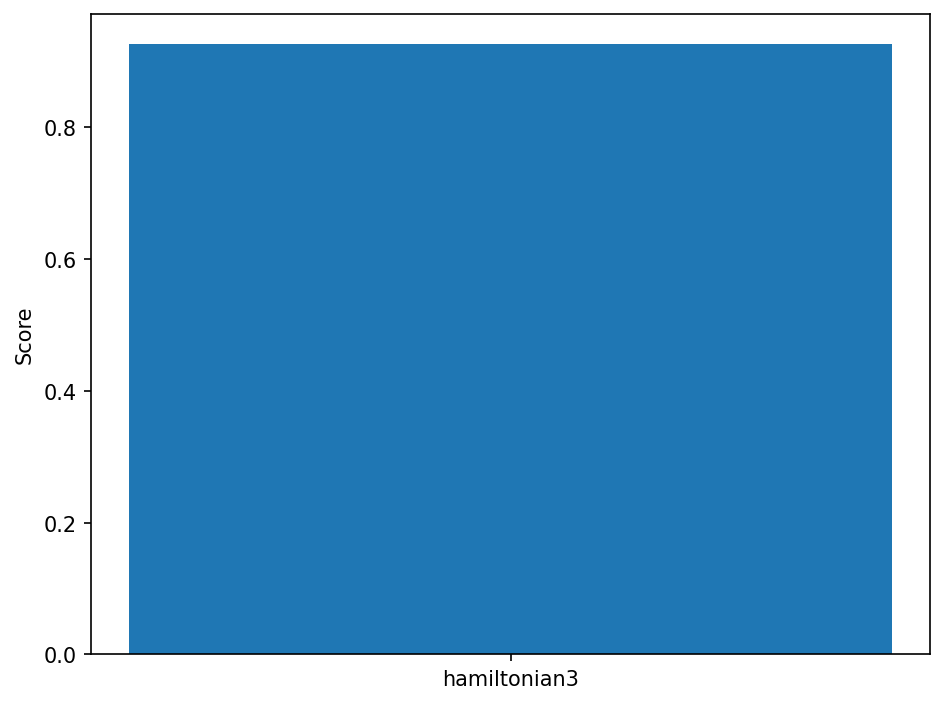

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9185132760733923


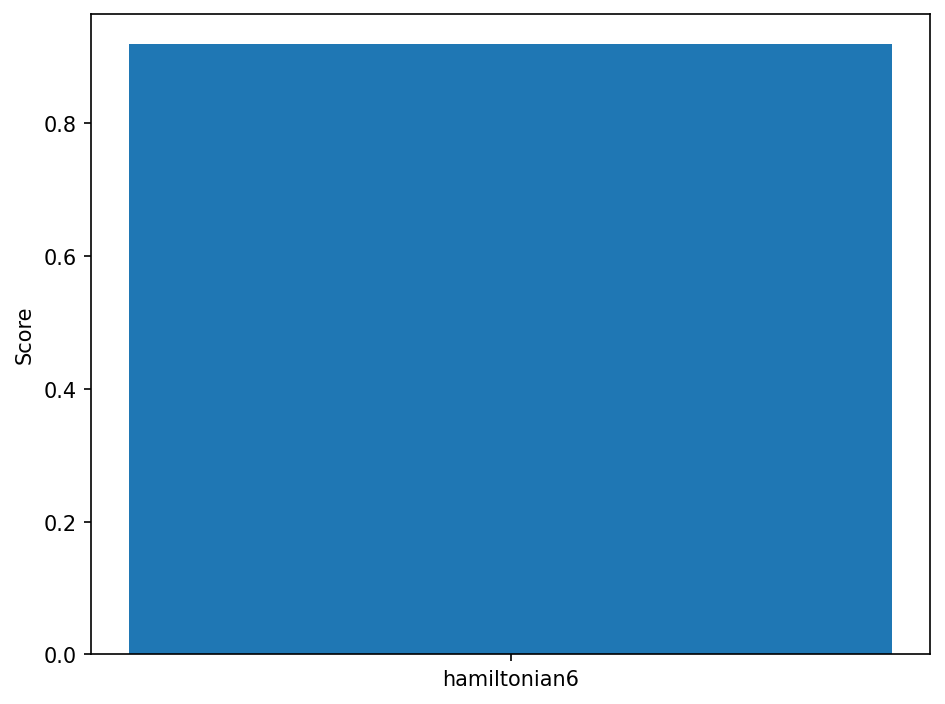

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9275132760733925


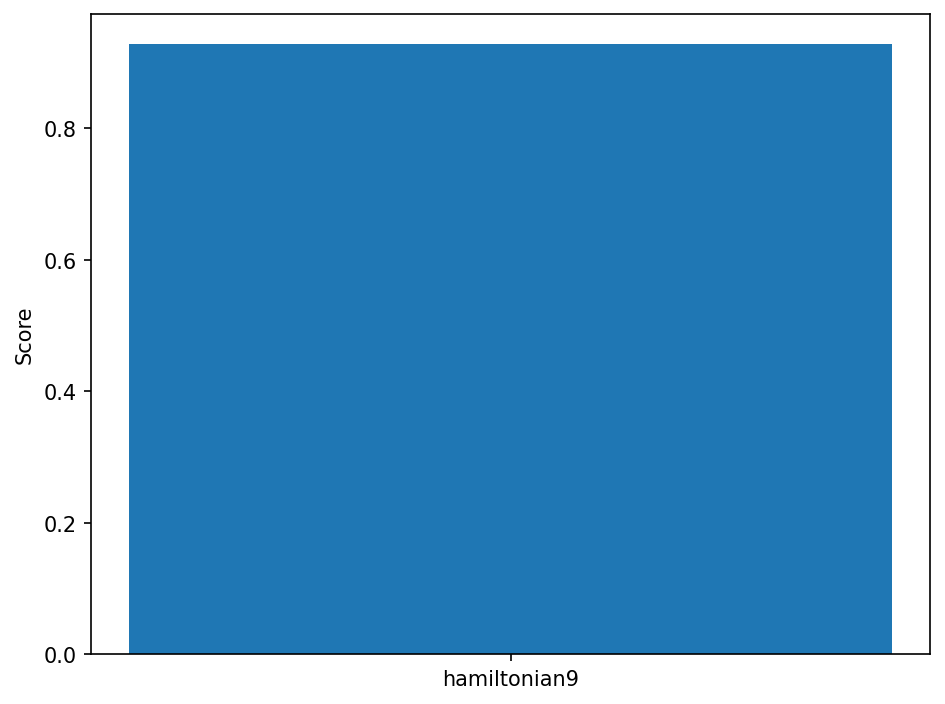

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.8681132760733938


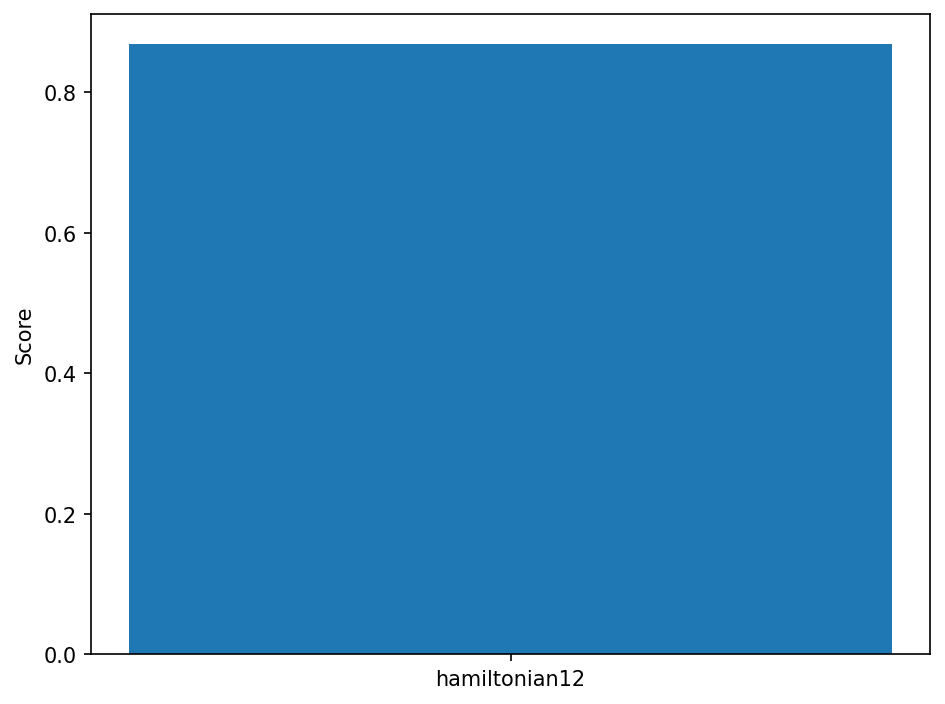

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.874259942740059


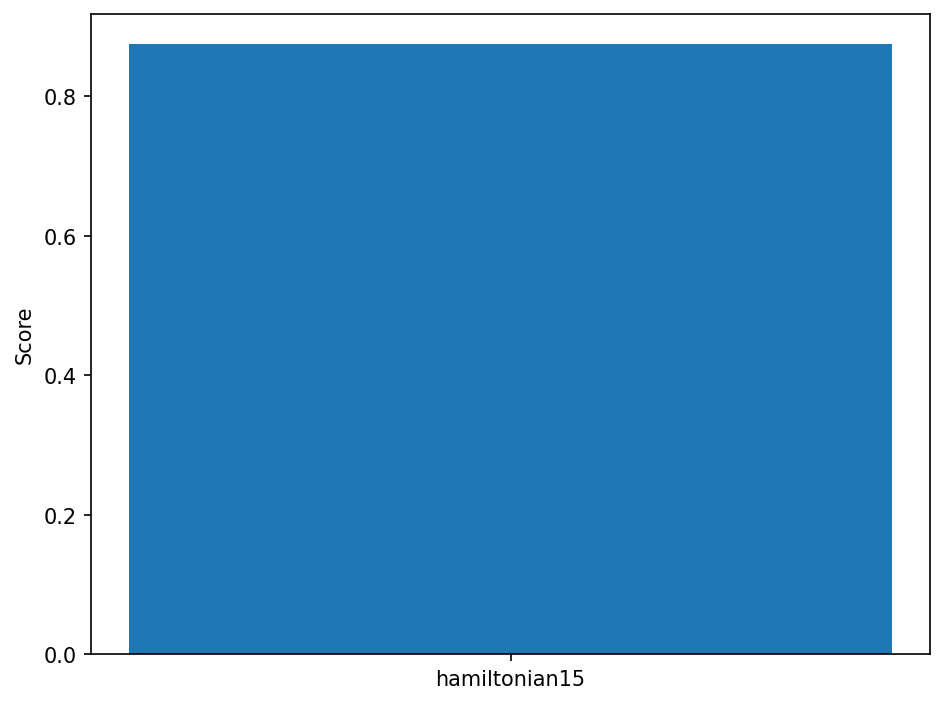

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.8414021649623953


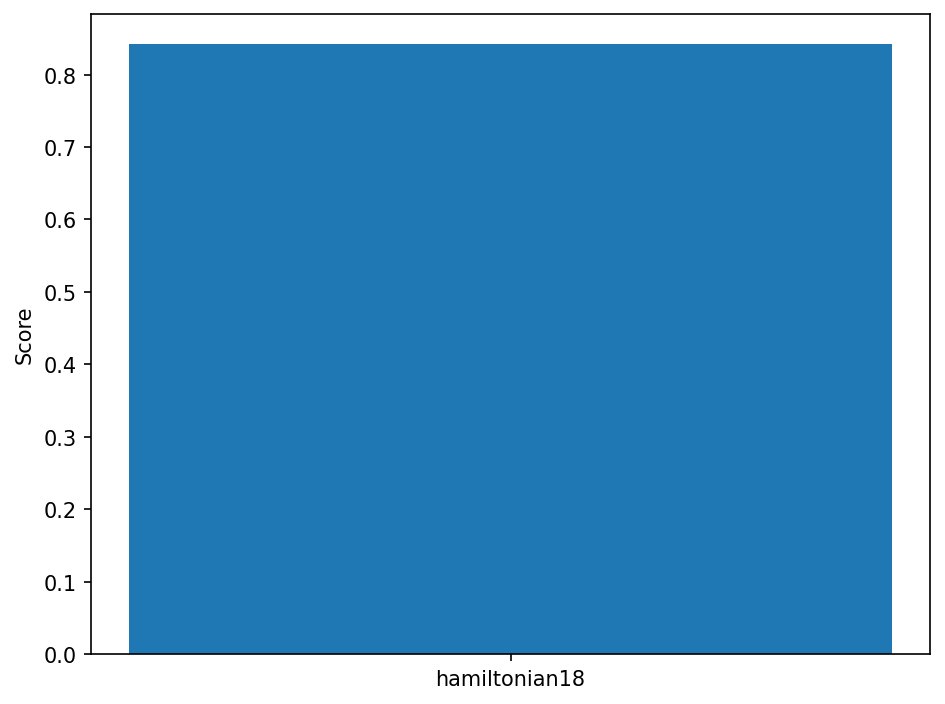

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9331799427400593


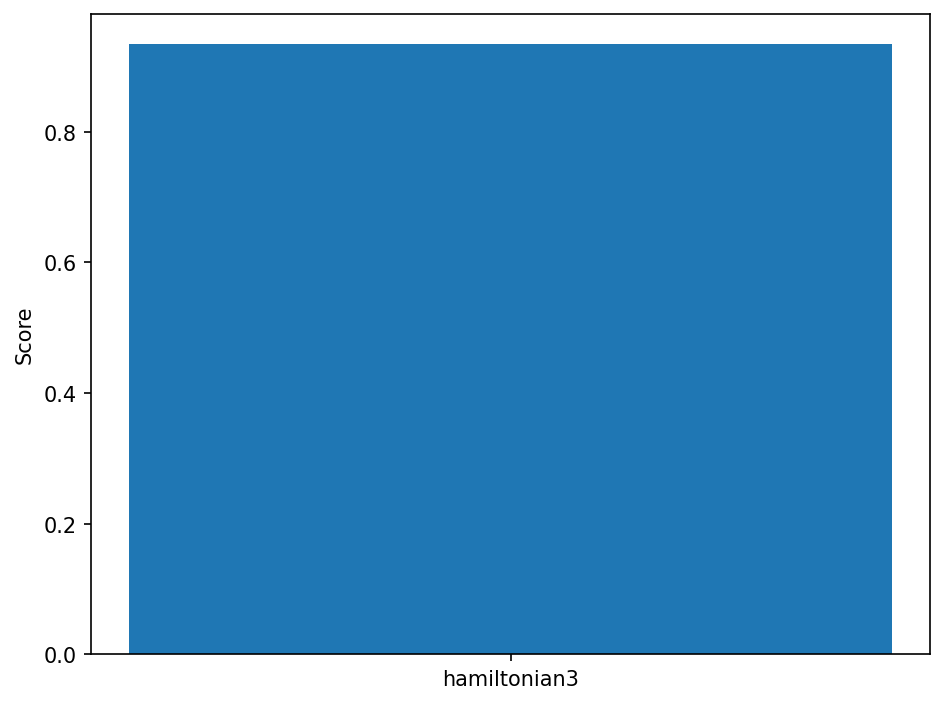

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9445132760733923


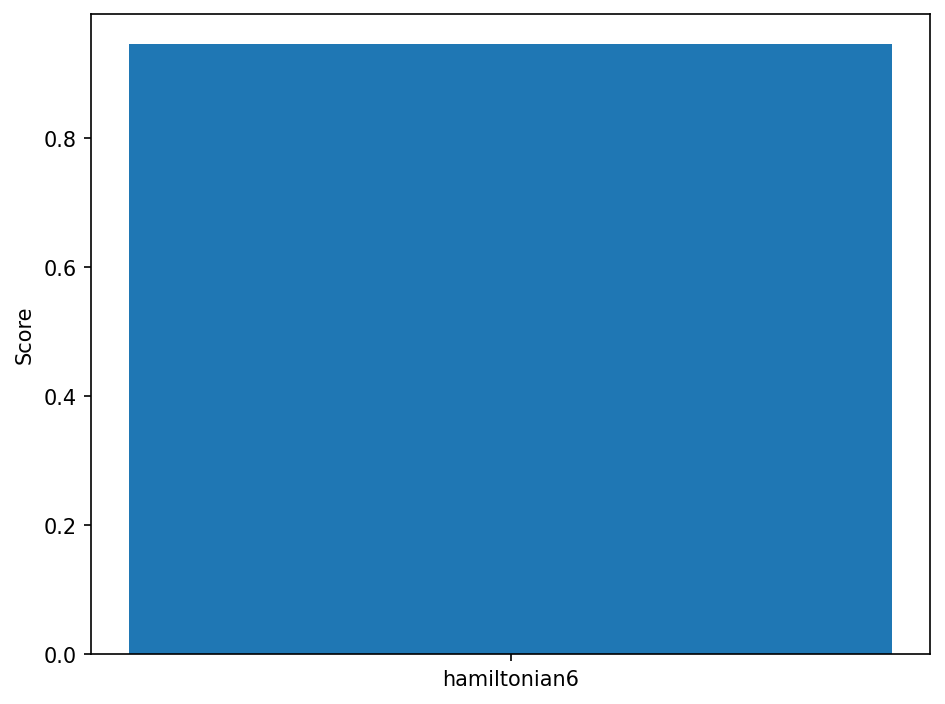

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9590243871845034


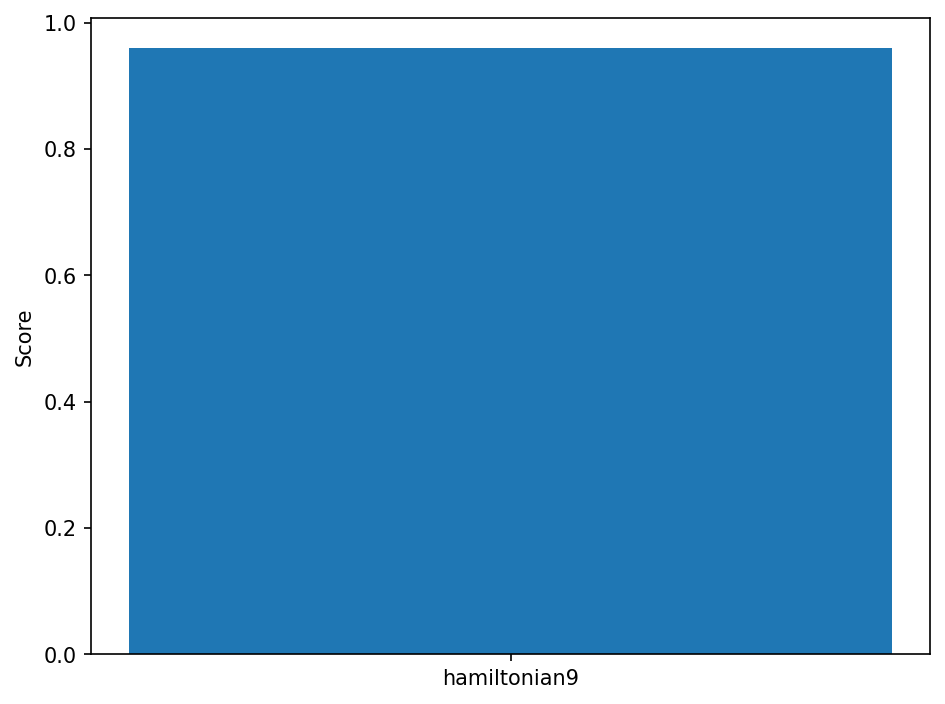

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9685966094067275


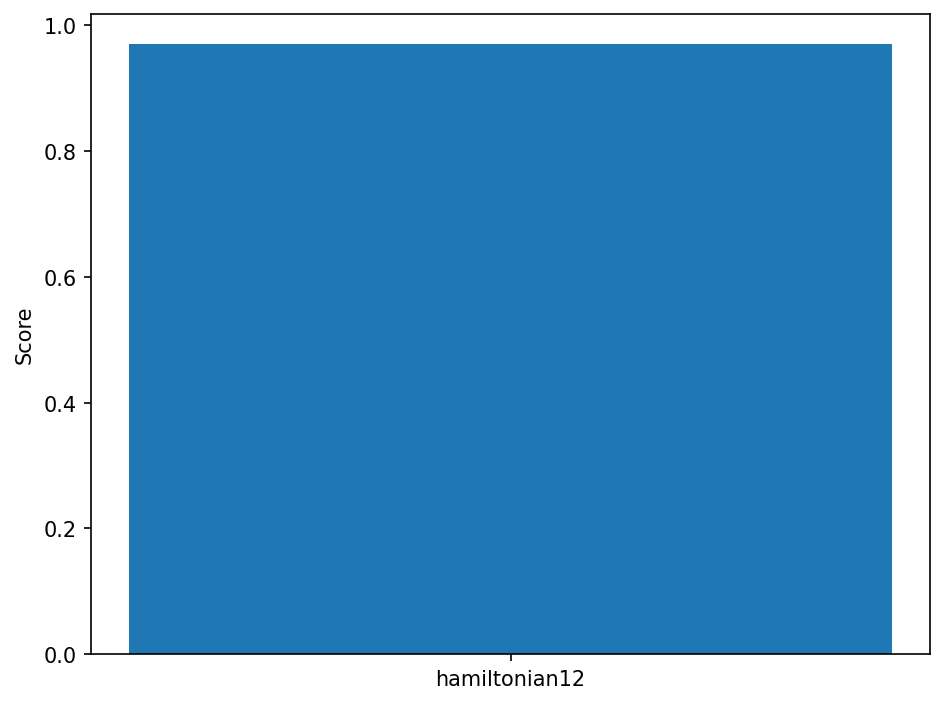

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9765666094067285


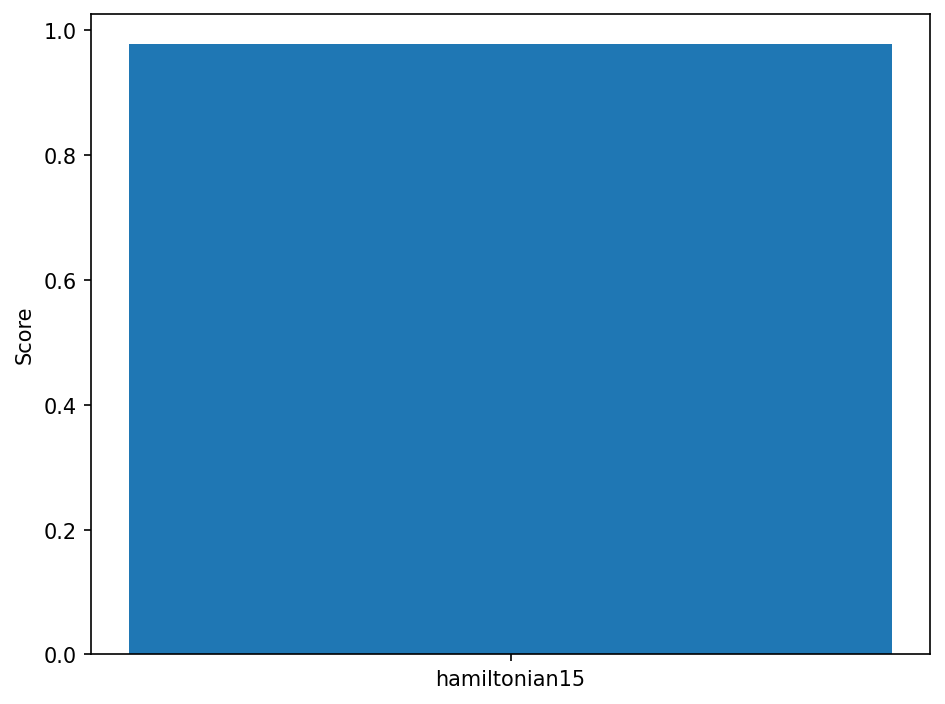

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9796021649623944


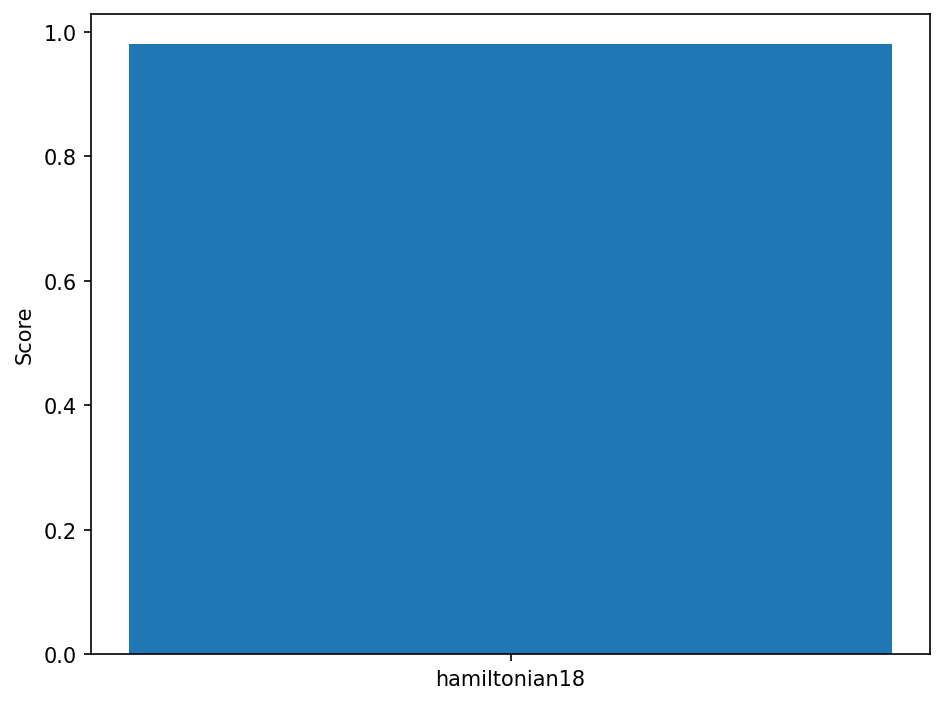

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9581799427400591


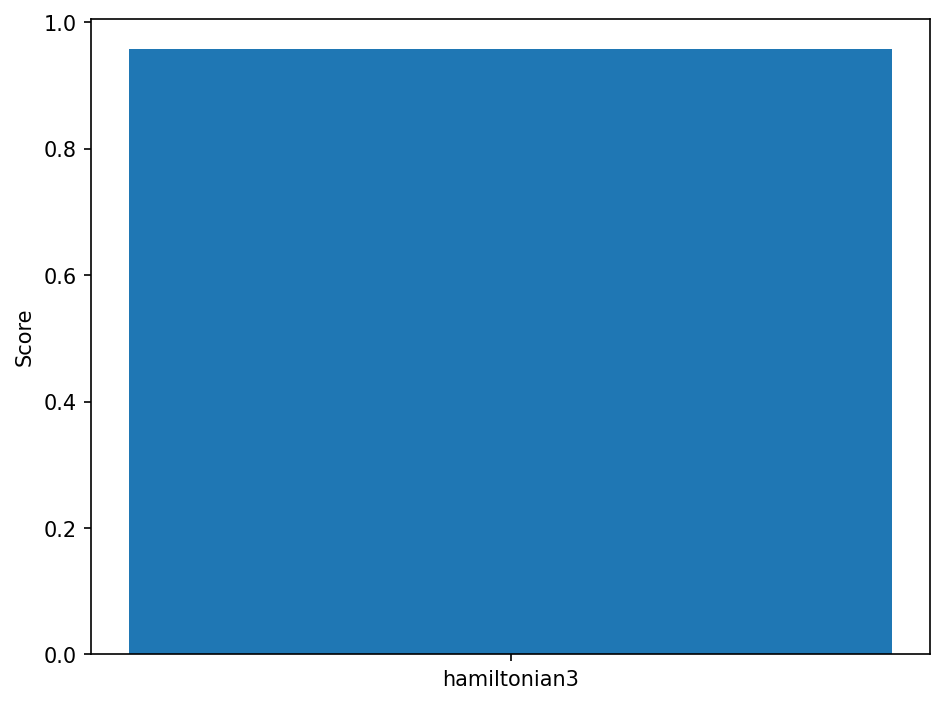

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9474132760733923


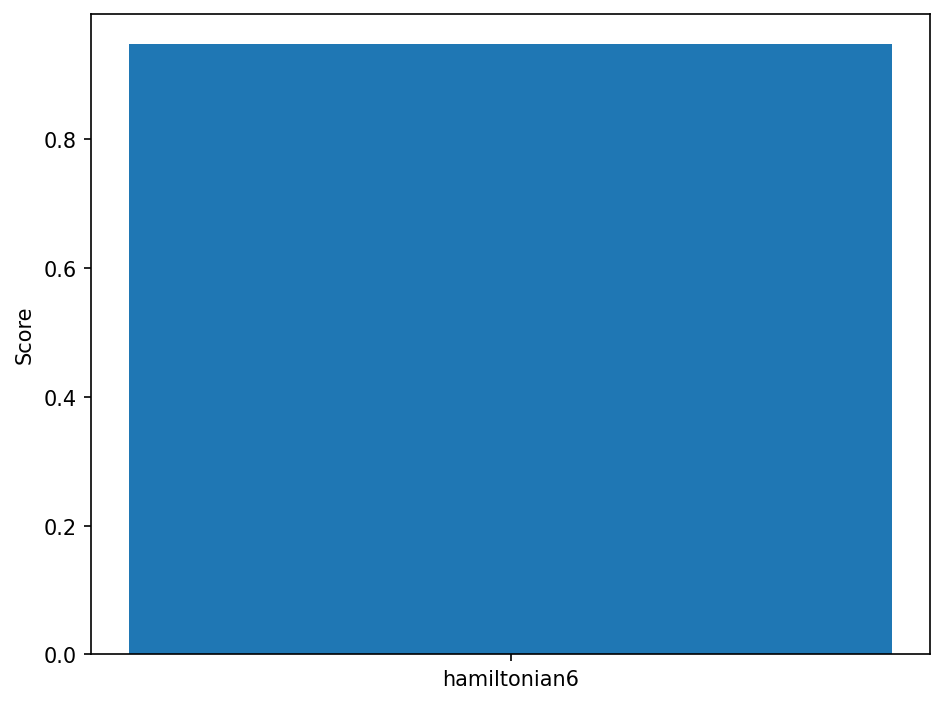

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9679132760733925


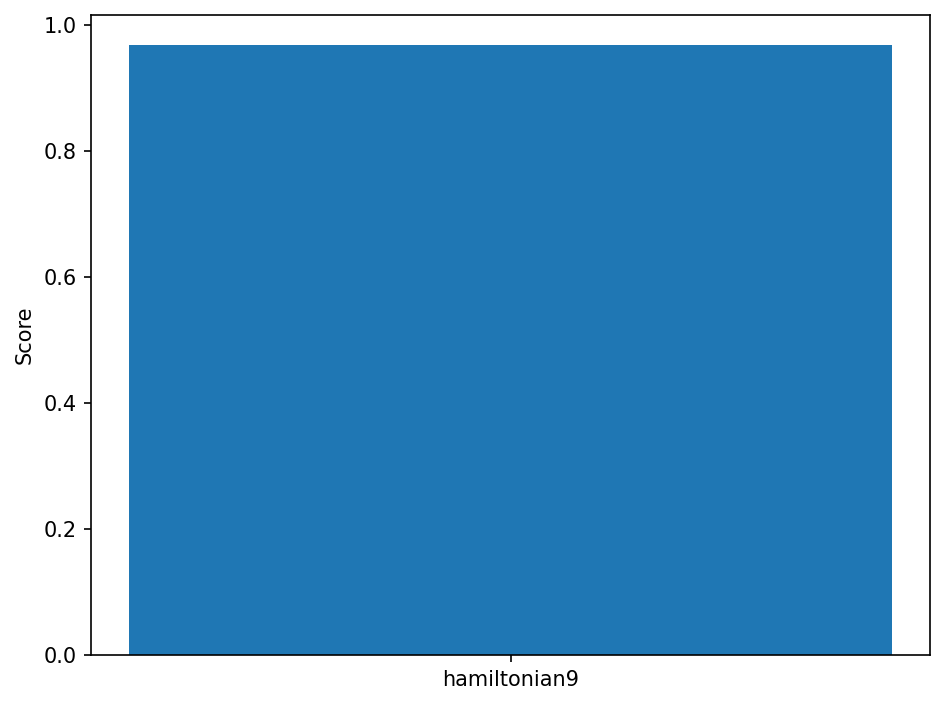

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9754799427400609


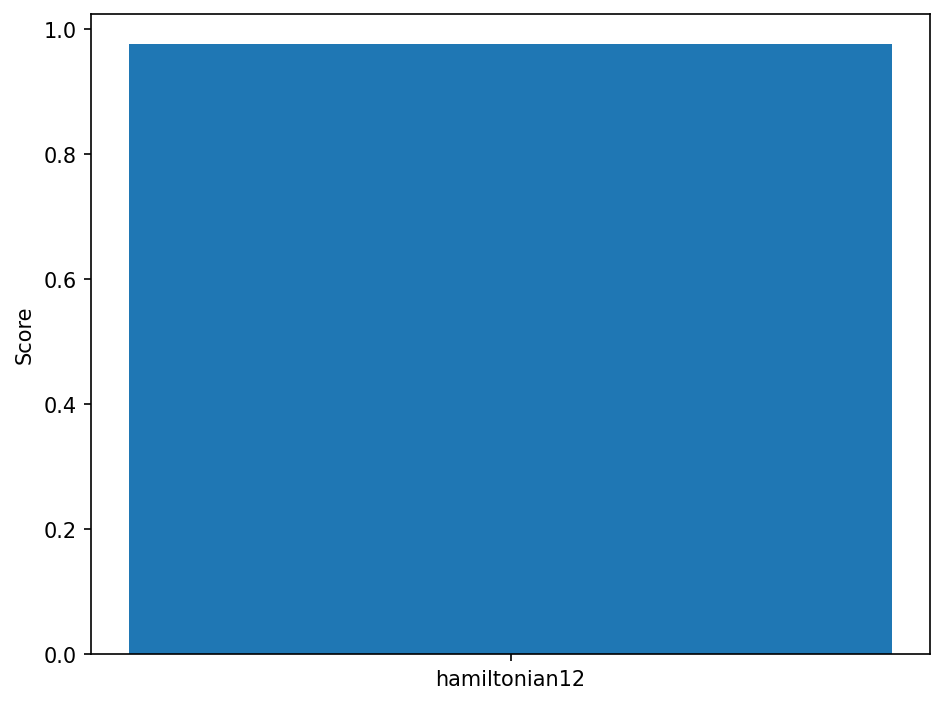

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9798599427400617


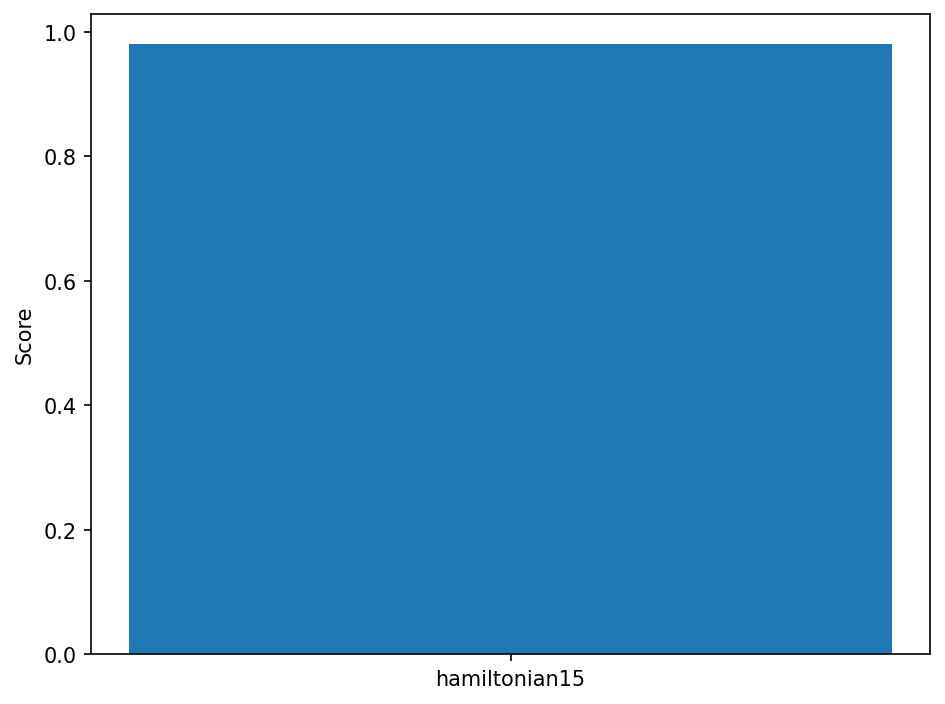

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9850132760735054


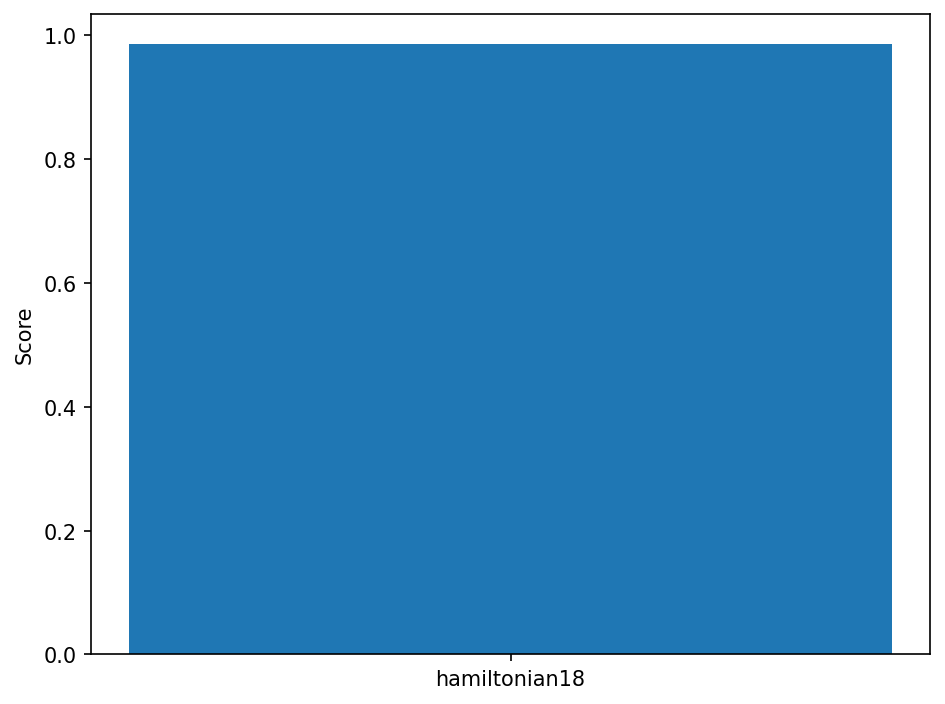

-----------------------------------------------------------
USED BACKEND:: fake_sydney ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.958446609406726


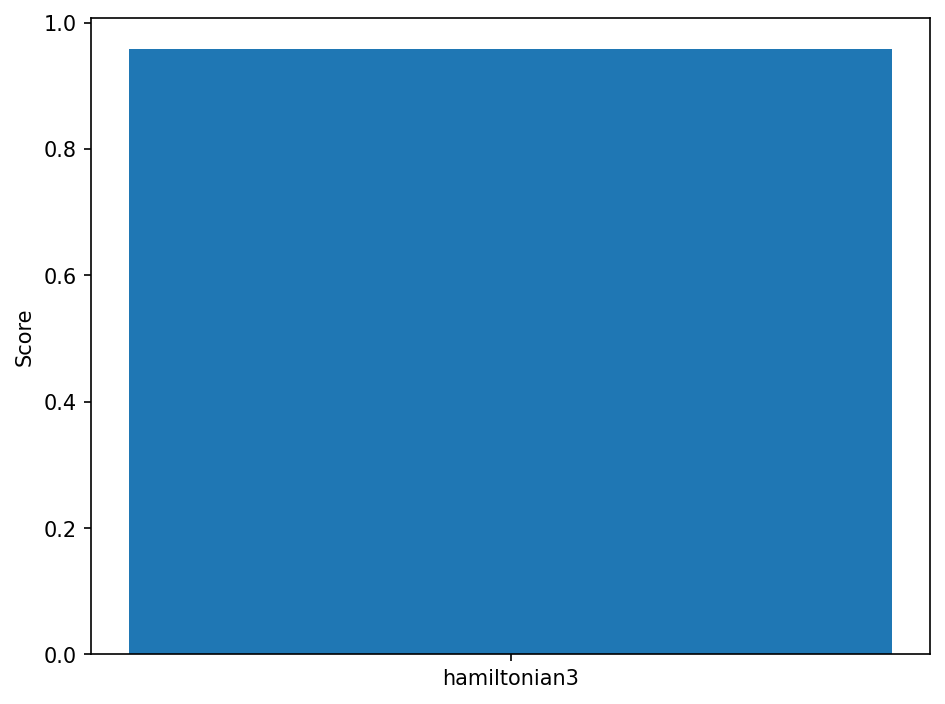

-----------------------------------------------------------
USED BACKEND:: fake_sydney ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.968079942740059


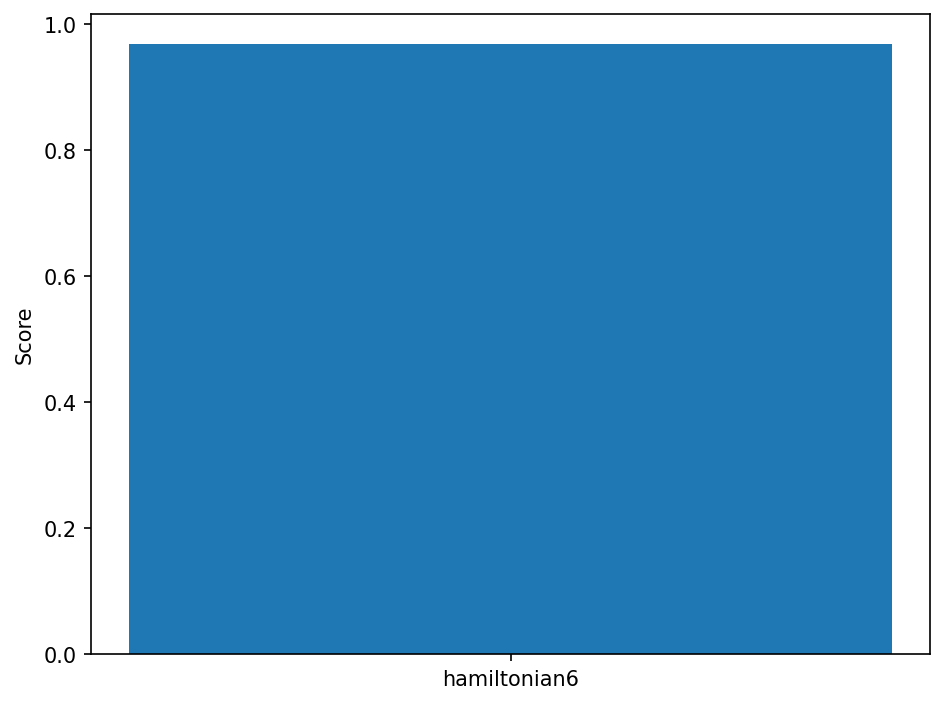

-----------------------------------------------------------
USED BACKEND:: fake_sydney ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9637577205178367


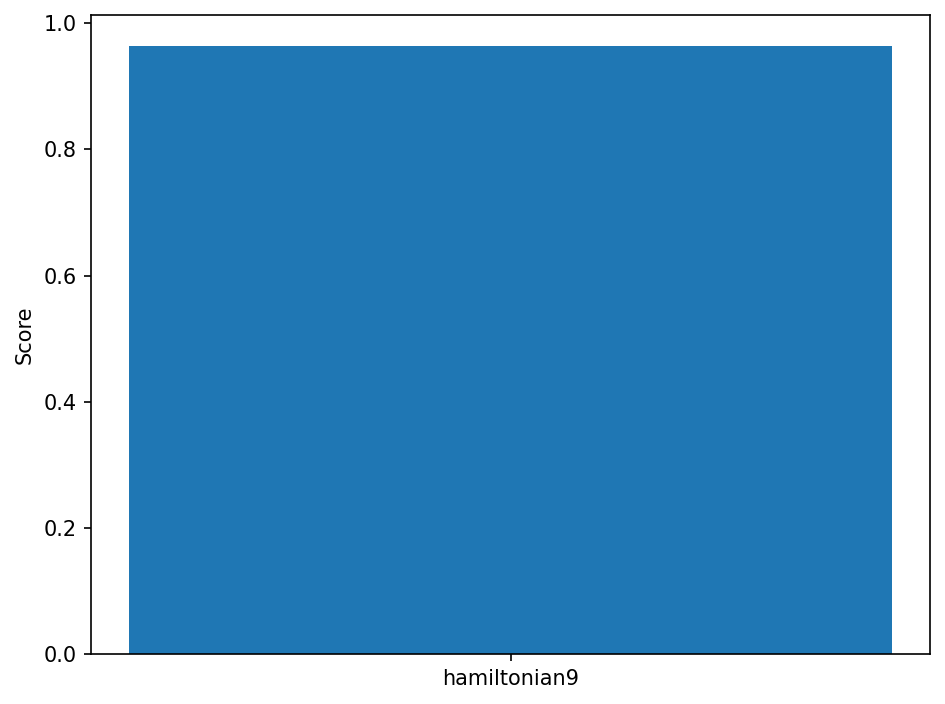

-----------------------------------------------------------
USED BACKEND:: fake_sydney ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.966629942740061


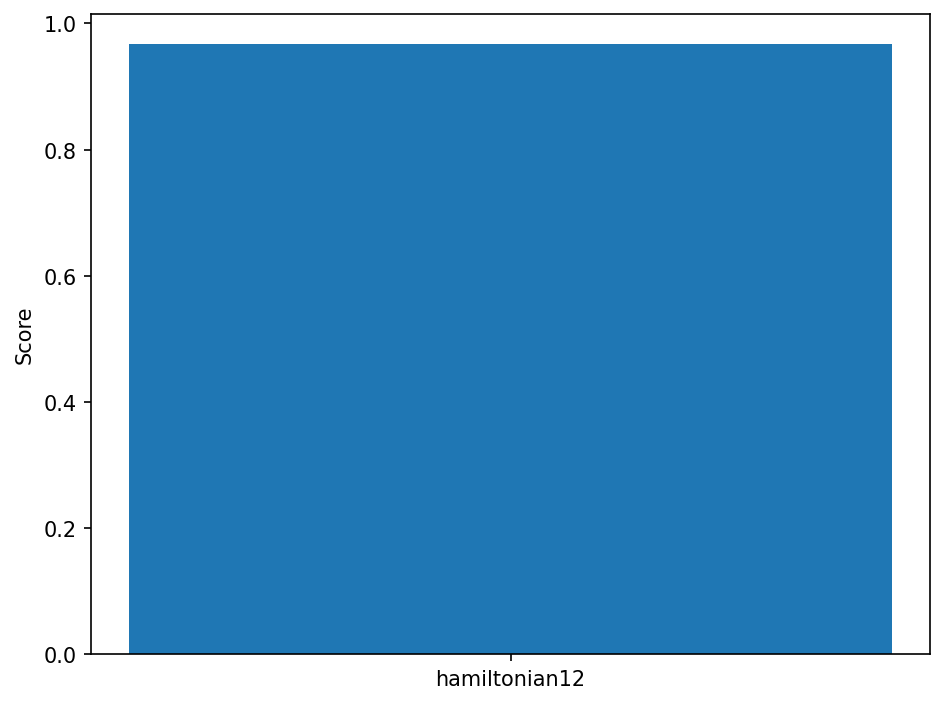

-----------------------------------------------------------
USED BACKEND:: fake_sydney ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9623799427400621


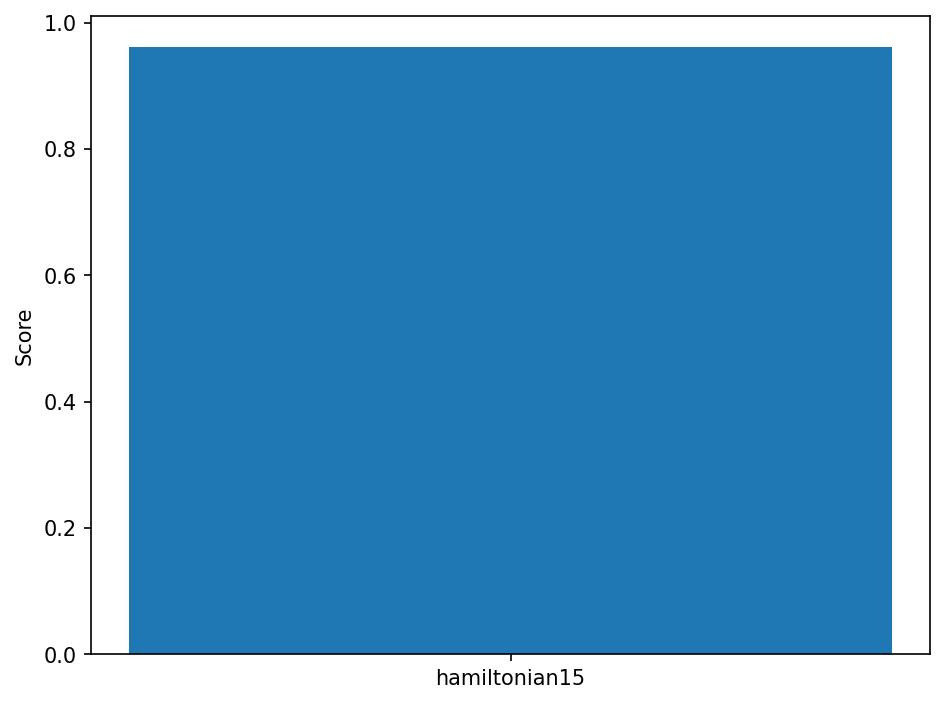

-----------------------------------------------------------
USED BACKEND:: fake_sydney ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9639354982957278


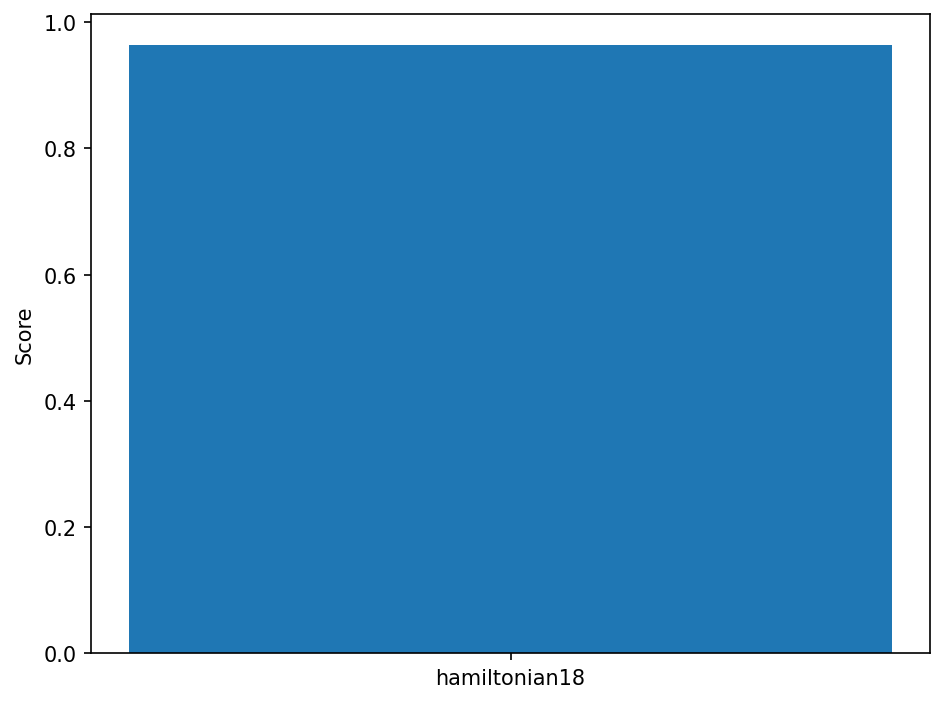

-----------------------------------------------------------
USED BACKEND:: fake_santiago ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9713799427400593


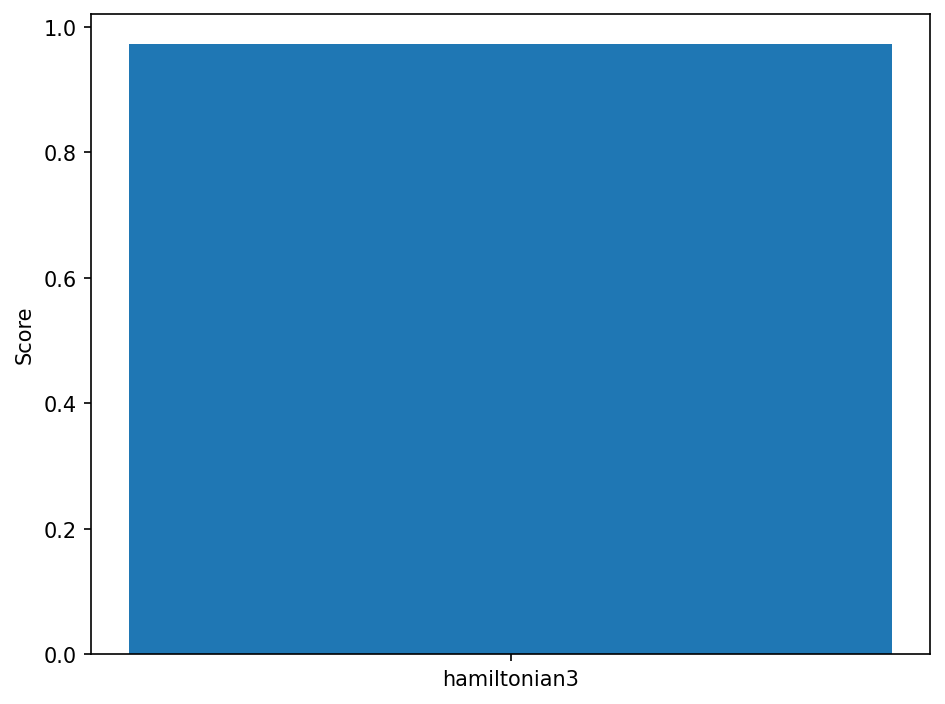

-----------------------------------------------------------
USED BACKEND:: fake_santiago ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.980479942740059


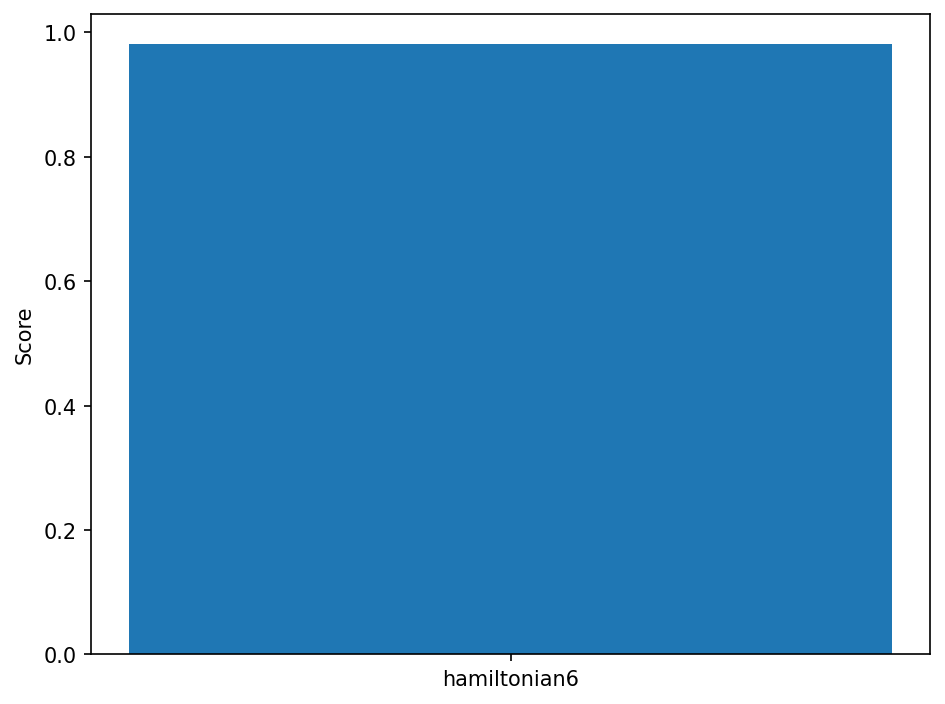

-----------------------------------------------------------
USED BACKEND:: fake_santiago ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9861577205178369


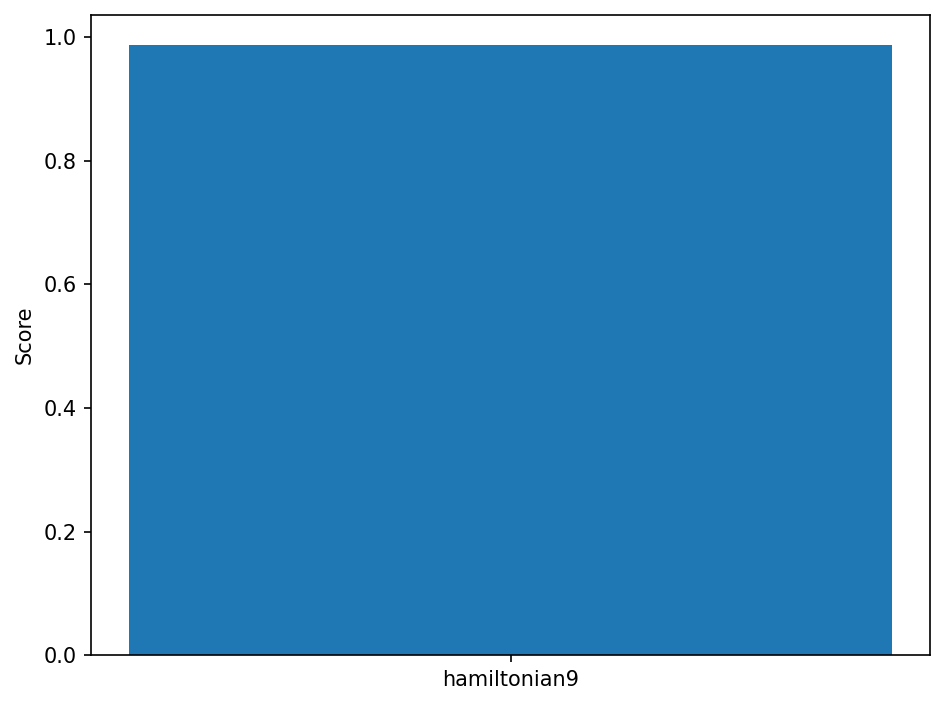

-----------------------------------------------------------
USED BACKEND:: fake_santiago ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9901799427400609


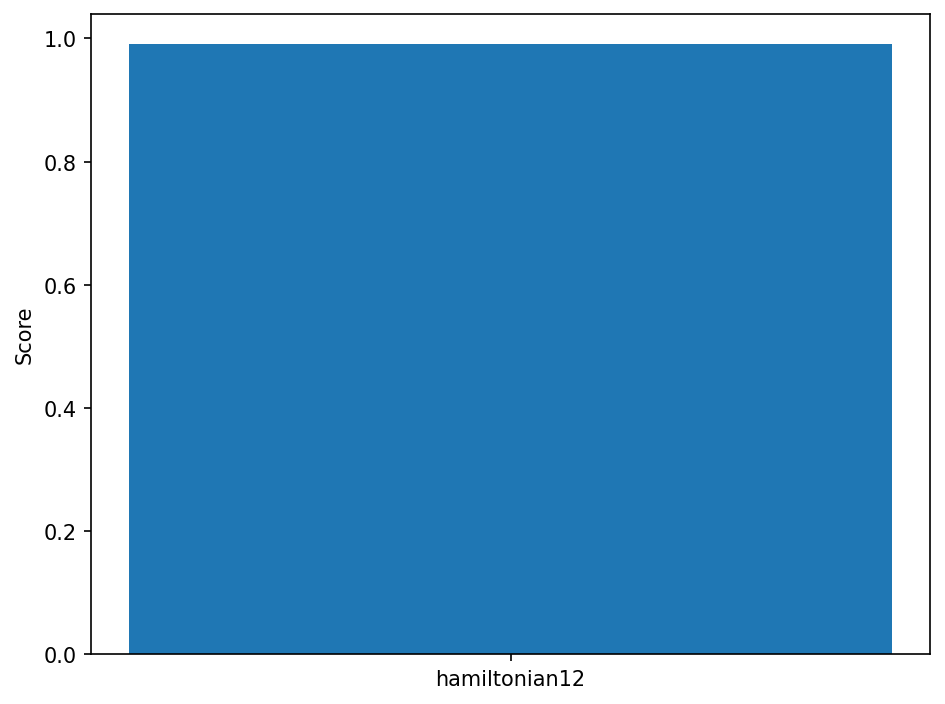

-----------------------------------------------------------
USED BACKEND:: fake_santiago ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9907399427400616


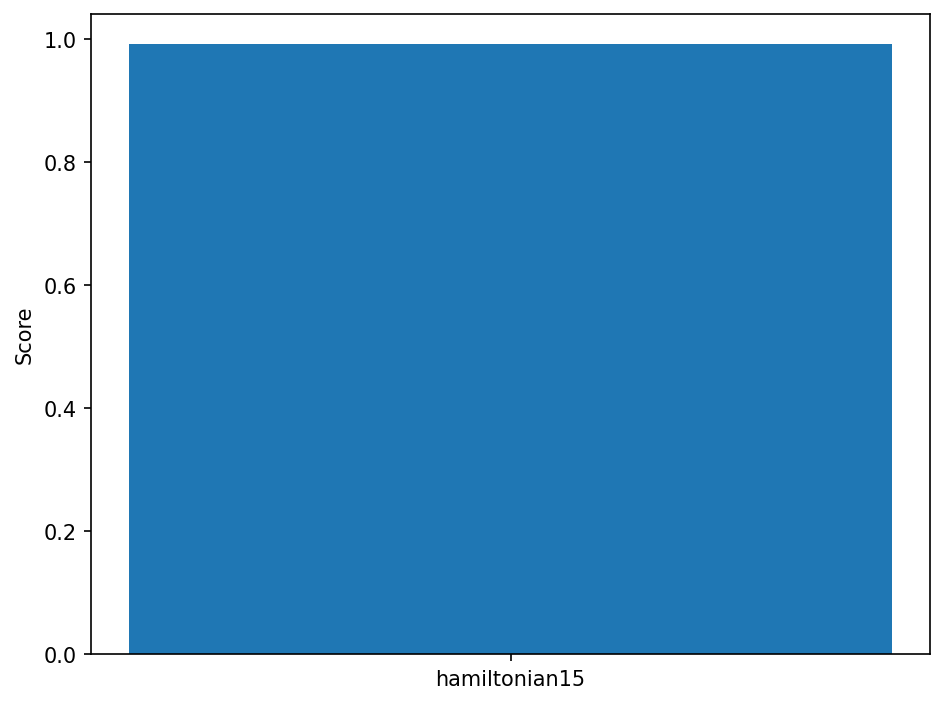

-----------------------------------------------------------
USED BACKEND:: fake_santiago ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9912577205179499


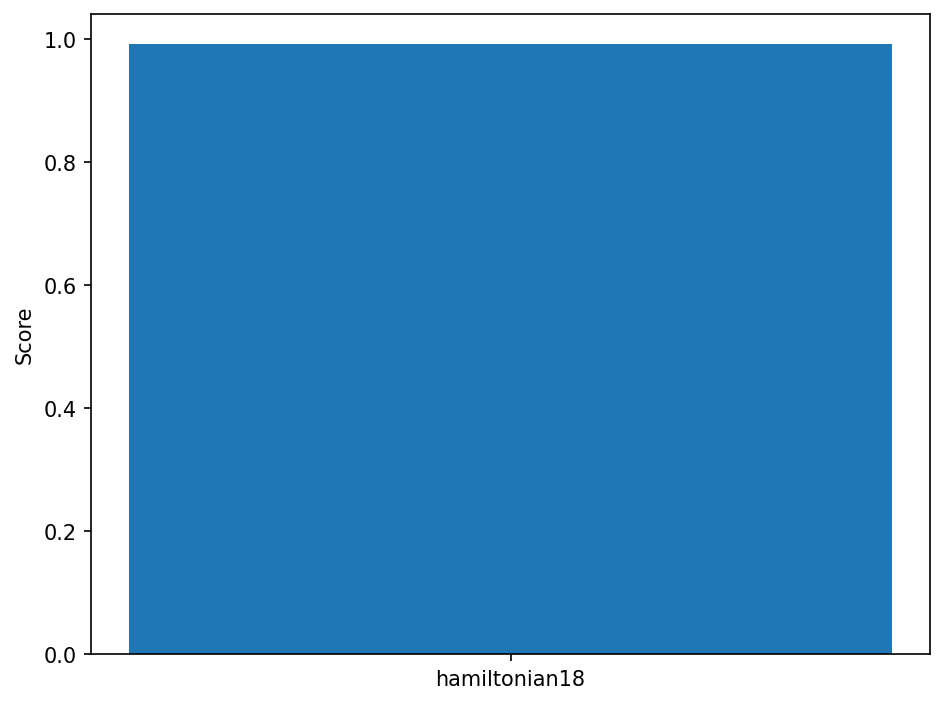

-----------------------------------------------------------


In [8]:
for label,benchmark,backend,job,score,sd,exec,tot in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

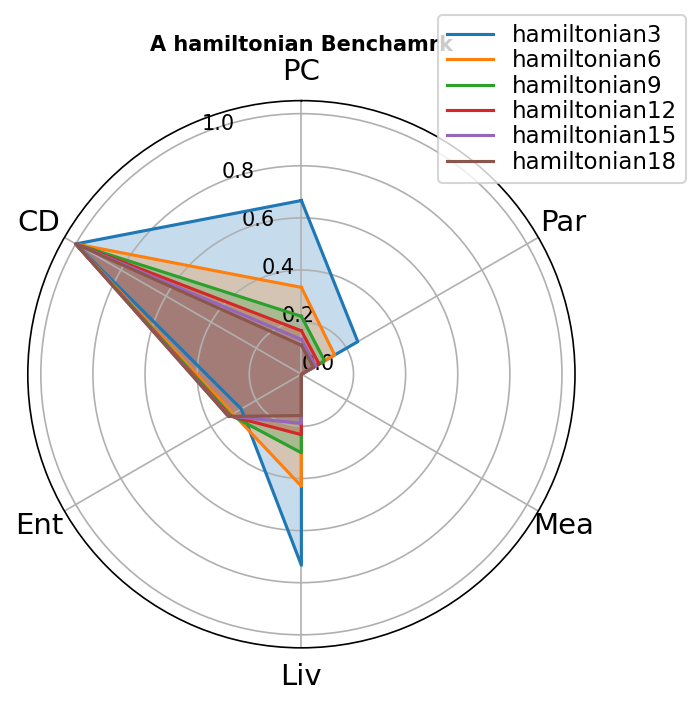

In [9]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

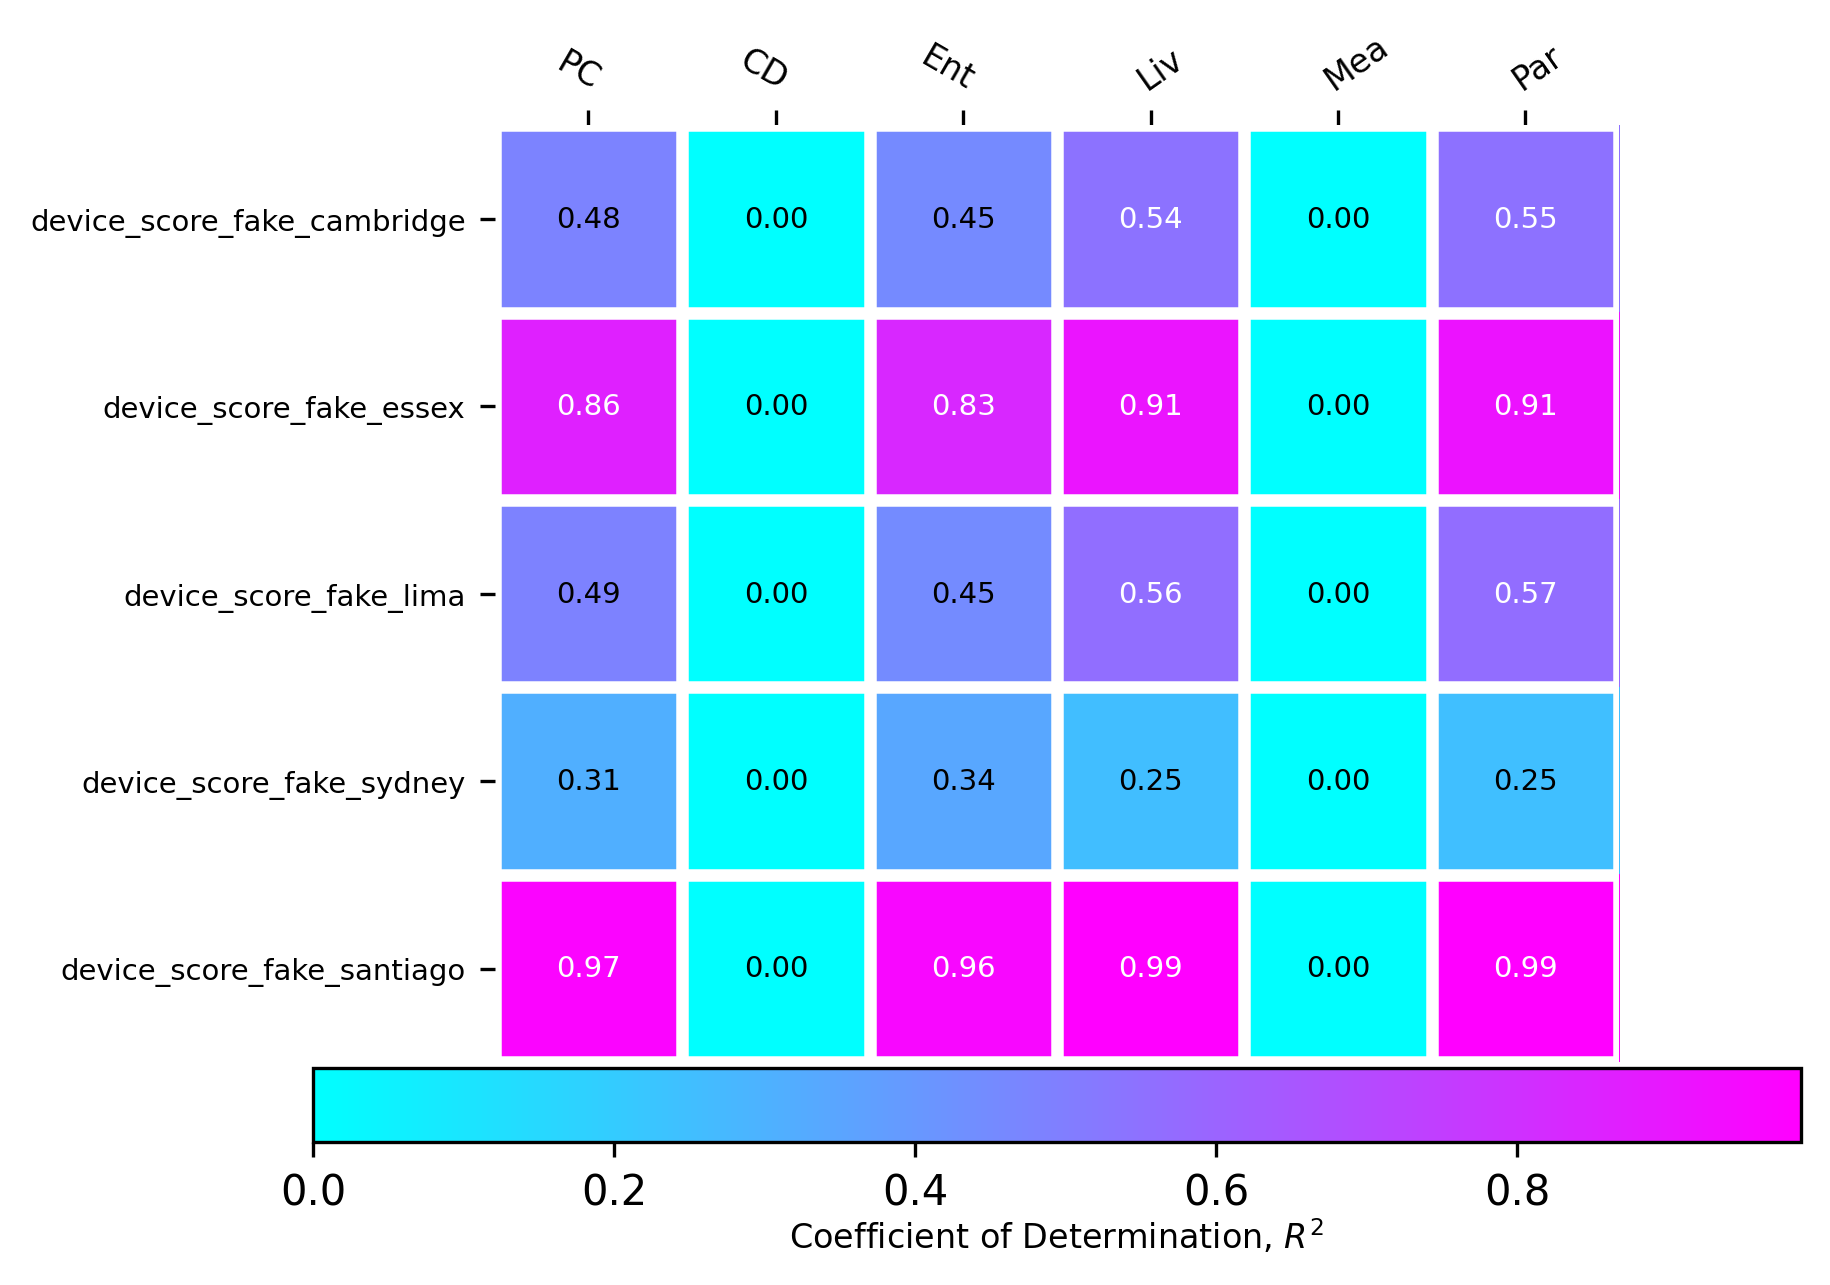

In [10]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

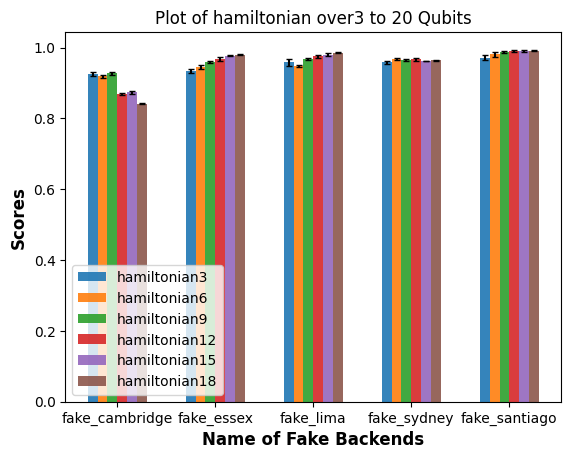

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
v='Plot of '+name_of_algo+' over'+str(lower_limit)+' to '+str(upper_limit)+ ' Qubits'
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd,exec,tot in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title(v)
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()